# **Name : Arvind Devkate Roll no: 220215**

Q1. Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.

    a. What is the sample space for this experiment?

    b. We define event A as the jelly bean drawn is strawberry-flavored and event B as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events A and B?

    c. Are events A and B mutually exclusive? Why or why not?


In [ ]:
'''
Sample Space S
S={ 'strawberry-1', 'strawberry-2', 'blueberry' , 'cinnamon' }

A={ 'strawberry-1', 'strawberry-2' }
B={ 'strawberry-1', 'strawberry-2', 'blueberry' }

P(A)=0.50
P(B)=0.75

No Events A and B are not mutually exclusive as P(A and B) != 0 (i.e non-zero) '''

"\nSample Space S\nS={ 'strawberry-1', 'strawberry-2', 'blueberry' , 'cinnamon' }\n\nA={ 'strawberry-1', 'strawberry-2' }\nB={ 'strawberry-1', 'strawberry-2', 'blueberry' }\n\nP(A)=0.50\nP(B)=0.75\n\nNo Events A and B are not mutually exclusive as P(A and B) != 0 (i.e non-zero) "

 Q2. Previously, we defined a **Python function P** to compute the probability of an event using the naive definition of probability. Generalize that function to compute the probability of events when they are
 not all equally likely. Use this new function to compute the probability of events A and B from the previous exercise.

 Hint: you can pass a third argument with the probability of each event.

In [ ]:
def P(S, A): # A = event , S = sample space
    if set(A).issubset(set(S)): # set A is an event
        return len(A)/len(S)
    else:
        return 0

In [ ]:
S={ 'strawberry-1', 'strawberry-2', 'blueberry' , 'cinnamon' }
A={ 'strawberry-1', 'strawberry-2' }
B={ 'strawberry-1', 'strawberry-2', 'blueberry' }

print("P(A):" , P(S,A))
print("P(B):" , P(S,B))
print("P(S):" , P(S,S))

P(A): 0.5
P(B): 0.75
P(S): 1.0


Q3.  Use PreliZ to explore different parameters for the Gaussian distributions. Use the methods `plot_pdf`, `plot_cdf`, and `plot_interactive`. We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf. Using the `plot_ppf` method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions. Can you explain how the ppf is related to the cdf and pmf/pdf?

In [ ]:
# Setting up the dependencies: (DO NOT EDIT THE LINES BELOW)
!pip install pymc==5.8.0 arviz==0.16.1 bambi==0.13.0 pymc-bart==0.5.2 kulprit==0.0.1 preliz==0.3.6 nutpie==0.9.1

In [2]:
# Import necessary libraries
import arviz as az  # For Bayesian data analysis and visualization
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
from scipy.special import binom, beta  # For binomial and beta distributions
import preliz as pz # defining priors
import math

[None, None]

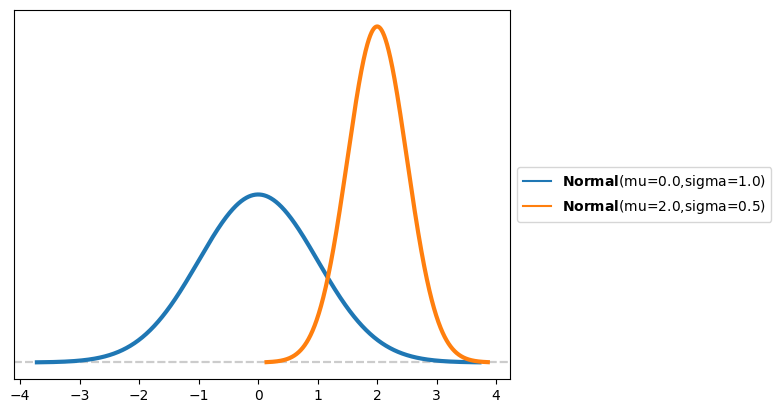

In [3]:
mus = [0,2]
sigmas = [1, 0.5]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_pdf()

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]

[None]

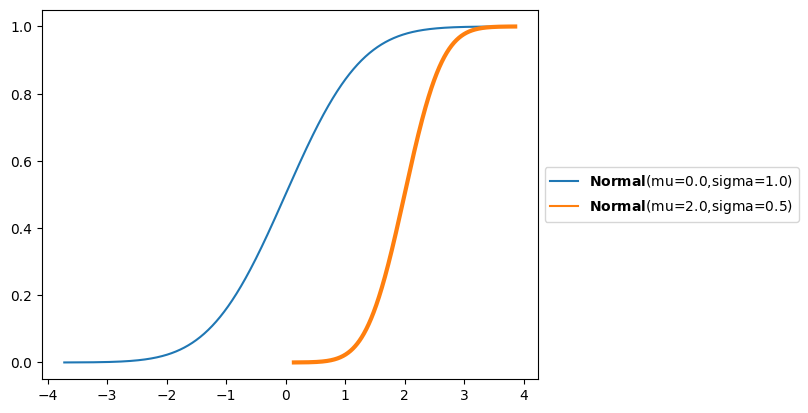

In [4]:
mus = [0,2]
sigmas = [1, 0.5]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_cdf()

[line.set_linewidth(3.) for line in ax.get_lines()[1::2]]

interactive(children=(FloatSlider(value=2.0, description='mu (0, inf)', max=12.0, min=2.220446049250313e-16, s…

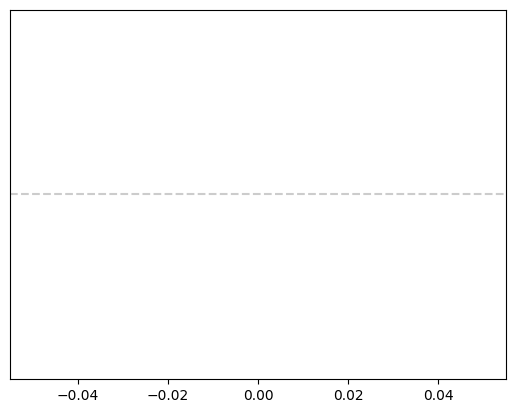

In [4]:
pz.Gamma(mu=2, sigma=1).plot_interactive()

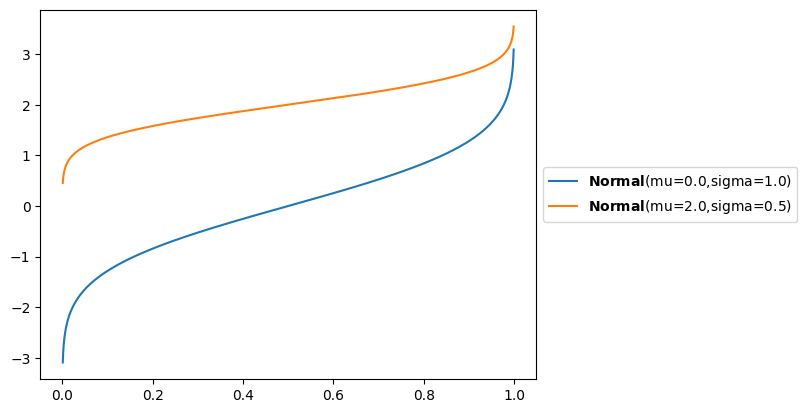

In [5]:
mus = [0,2]
sigmas = [1, 0.5]
for mu, sigma in zip(mus, sigmas):
    ax = pz.Normal(mu, sigma).plot_ppf()

In [ ]:
'''The cdf tells the overall probability up to a certain point,
the PMF/PDF describe the probability density at each value, and the ppf helps 
to translate probabilities into specific values within the distribution

ppf tells the specific value (x) in the distribution for 
which the cumulative probability (cdf) is equal to the given probability (p)'''

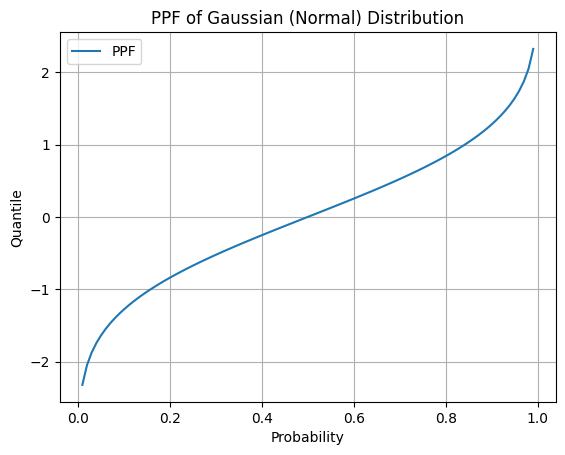

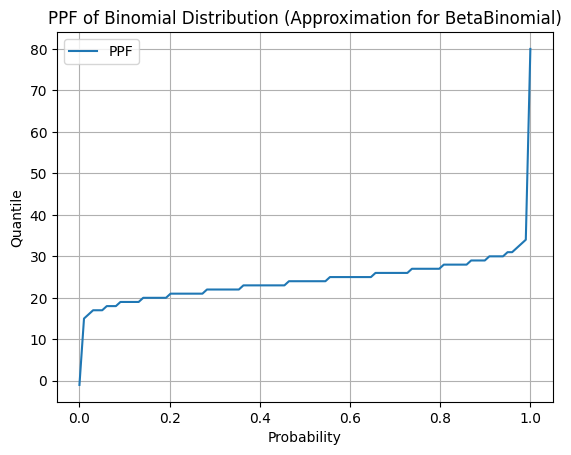

In [7]:
import scipy.stats as stats

def plot_ppf(distribution, title, x_vals=np.linspace(0, 1, 100)):
    ppf_vals = distribution.ppf(x_vals)
    plt.plot(x_vals, ppf_vals, label='PPF')
    plt.title(title)
    plt.xlabel('Probability')
    plt.ylabel('Quantile')
    plt.grid(True)
    plt.legend()
    plt.show()

# Gaussian distribution
gaussian_dist = stats.norm(loc=0, scale=1)

plot_ppf(gaussian_dist, "PPF of Gaussian (Normal) Distribution")

# binomial distribution
binom_dist = stats.binom(n=80, p=0.3)

plot_ppf(binom_dist, "PPF of Binomial Distribution (Approximation for BetaBinomial)")

Q4. Use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes,
like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. Report your obervations.

In [20]:
import numpy as np
import scipy.stats as stats

alpha = 2  # Skewness parameter
mu = 0   # Location parameter mean
sigma = 4 # Scale parameter standard deviation
skewnorm_dist = stats.skewnorm(a=alpha, loc=mu, scale=sigma)

theoretical_mean = skewnorm_dist.mean()
theoretical_variance = skewnorm_dist.var()

print("Theoretical Mean: ", theoretical_mean)
print("Theoretical Variance: ",theoretical_variance)

Theoretical Mean:  2.854598585844434
Theoretical Variance:  7.851266913694957


Sample Size: 10
Sample Mean: 2.99307231134818
Sample Variance: 8.067361341743792


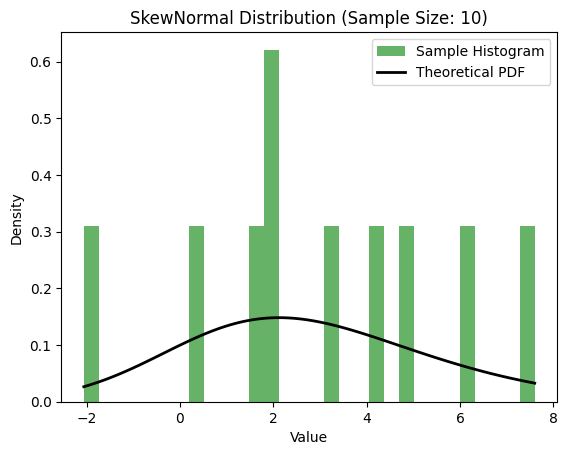

Sample Size: 100
Sample Mean: 2.900761212488323
Sample Variance: 7.068064247418192


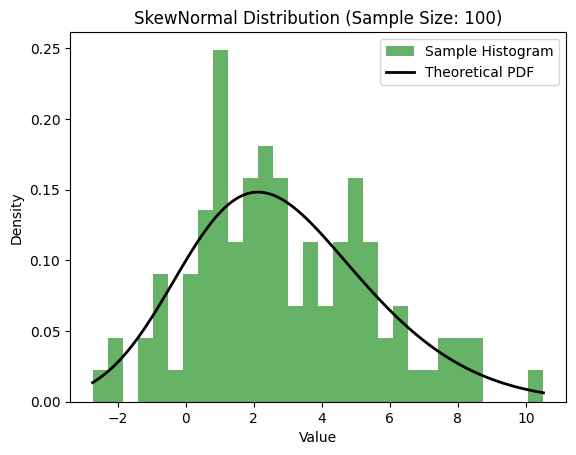

Sample Size: 1000
Sample Mean: 2.8846176019447882
Sample Variance: 7.916090362794128


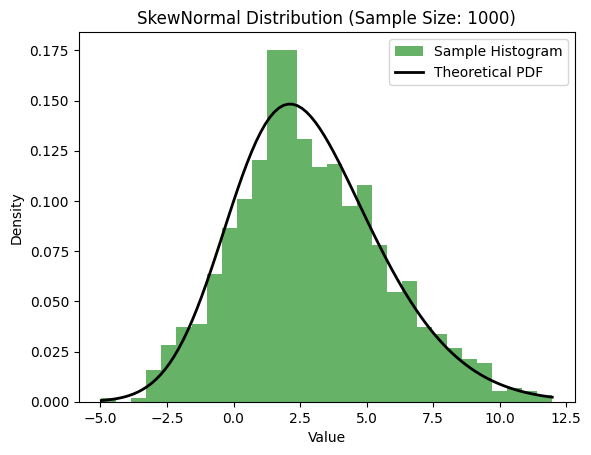

In [21]:
def calculate_sample_moments(samples):
    sample_mean = np.mean(samples)
    sample_variance = np.var(samples, ddof=1)
    return sample_mean, sample_variance

sample_sizes = [10, 100, 1000]
for size in sample_sizes:
    samples = skewnorm_dist.rvs(size=size)
    sample_mean, sample_variance = calculate_sample_moments(samples)
    print(f"Sample Size: {size}")
    print(f"Sample Mean: {sample_mean}")
    print(f"Sample Variance: {sample_variance}")


    plt.hist(samples, bins=30, alpha=0.6, color='g', density=True, label='Sample Histogram')
    x = np.linspace(min(samples), max(samples), 100)
    plt.plot(x, skewnorm_dist.pdf(x), 'k-', lw=2, label='Theoretical PDF')
    plt.title(f"SkewNormal Distribution (Sample Size: {size})")
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

<Axes: >

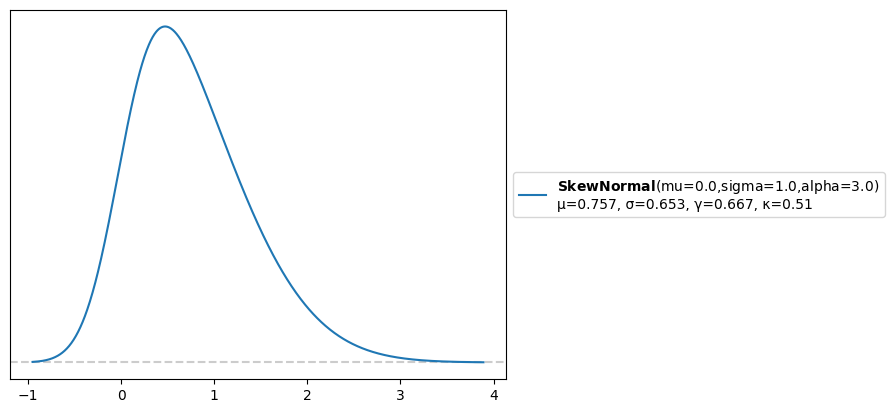

In [22]:
pz.SkewNormal(0, 1, 3).plot_pdf(moments=["m", "d", "s", "k"])